# Digital Text in the Humanities

## Project work

In [1]:
from normalization_functions import *
from analytics_functions import *
from sentiment_functions import *
from visualizations_functions import *

### Section 1: Corpora & Texts

#### 1.1) Corpora creation and presentation

During this first step, the aim is to create the two distinct corpora over which our project is based:

In [2]:
f_directory = "Raw/F/"
m_directory = "Raw/M/"
f_corpus = create_corpus(f_directory)
m_corpus = create_corpus(m_directory)

At this point, we extract the urls and titles of all the texts in our corpora in order to visualize them:

In [3]:
f_authors_texts = list()
f_titles = list()
for url in f_corpus.fileids():
    if url != '.DS_Store':
        f_authors_texts.append(f_directory+url)
        f_titles.append(url[:-4])

m_authors_texts = list()
m_titles = list()
for url in m_corpus.fileids():
    if url != '.DS_Store':
        m_authors_texts.append(m_directory+url)
        m_titles.append(url[:-4])

print("URLS of female authors texts:", f_authors_texts, '\n')
print("Titles of female authors texts:", f_titles, '\n')
print("URLS of male authors texts:", m_authors_texts, '\n')
print("Titles of male authors texts:", m_titles, '\n')

URLS of female authors texts: ['Raw/F/1857_grannys_wonderful_chair.txt', 'Raw/F/1857_the_rambles_of_a_rat.txt', 'Raw/F/1869_little_women.txt', 'Raw/F/1869_mrs_overtheways_remembrances.txt', 'Raw/F/1872_a_dog_of_flanders.txt', 'Raw/F/1877_black_beauty.txt', 'Raw/F/1877_the_cuckoo_clock.txt', 'Raw/F/1886_little_lord_fauntleroy.txt', 'Raw/F/1899_the_story_of_the_treasure_seekers.txt', 'Raw/F/1902_the_tale_of_peter_rabbit.txt', 'Raw/F/1903_rebecca_of_sunnybrook_farm.txt', 'Raw/F/1908_anne_of_green_gables.txt', 'Raw/F/1911_the_secret_garden.txt'] 

Titles of female authors texts: ['1857_grannys_wonderful_chair', '1857_the_rambles_of_a_rat', '1869_little_women', '1869_mrs_overtheways_remembrances', '1872_a_dog_of_flanders', '1877_black_beauty', '1877_the_cuckoo_clock', '1886_little_lord_fauntleroy', '1899_the_story_of_the_treasure_seekers', '1902_the_tale_of_peter_rabbit', '1903_rebecca_of_sunnybrook_farm', '1908_anne_of_green_gables', '1911_the_secret_garden'] 

URLS of male authors texts: 

#### 1.2) Basic analytics: Dimensions

The first thing we should analyze is the dimension of our corpora.

In order to do that we will use the following two functions contained in the [analytics file](analytics_functions.py):
- <span style="color:#EDAE49">corpus_size</span>: useful in order to compute the total number of texts in each corpus;
- <span style="color:#EDAE49">corpus_dimension</span>: thought in order to determine the total number of tokens in a corpus.

In [4]:
print("The size of our corpus of female authors is:", corpus_size(f_corpus))
print("The size of our corpus of male authors is:", corpus_size(m_corpus))

The size of our corpus of female authors is: 13
The size of our corpus of male authors is: 8


In [5]:
print("The dimension of our corpus of female authors is:", corpus_dimension(f_directory))
print("The dimension of our corpus of male authors is:", corpus_dimension(m_directory))

The dimension of our corpus of female authors is: 797175
The dimension of our corpus of male authors is: 798740


Now, what we want to do is to compute the lexical richeness of the texts contained in each corpus.</br>
In order to do that, we will use the <span style="color:#EDAE49">lexical_richeness</span> function, that will compute the lexical richeness of each text and return a dictionary in which such values will be stored.

In addition to the different values, we have also used some interactive graphical representations (taken from the [NotebookJS repository](https://github.com/jorgehpo/notebookJS)) to display differences between texts.

In [6]:
f_author_richness = lexical_richness(f_authors_texts)

file = "Visualizations/f_lexical_richness.csv"
if os.path.exists(file):
    os.remove(file)

csv_richness = open("Visualizations/f_lexical_richness.csv",'a')
csv_richness.write("text"+","+"richness"+'\n')
for key in f_author_richness:
    print(key[11:-4], ":", f_author_richness[key])
    csv_richness.write(key[11:-4]+","+str(f_author_richness[key])+'\n')
csv_richness.close()

radial_bar_chart_generator("Visualizations/f_lexical_richness.csv")

grannys_wonderful_chair : 0.10592697124713353
the_rambles_of_a_rat : 0.14052779778665445
little_women : 0.05623331064453636
mrs_overtheways_remembrances : 0.10719462492113027
a_dog_of_flanders : 0.18703924734957522
black_beauty : 0.06745258670929284
the_cuckoo_clock : 0.13014949766860548
little_lord_fauntleroy : 0.07892194253750318
the_story_of_the_treasure_seekers : 0.07457838621474318
the_tale_of_peter_rabbit : 0.3944954128440367
rebecca_of_sunnybrook_farm : 0.10553530444174429
anne_of_green_gables : 0.06944847265752913
the_secret_garden : 0.05787025880765338


In [7]:
m_author_richness = lexical_richness(m_authors_texts)

file = "Visualizations/m_lexical_richness.csv"
if os.path.exists(file):
    os.remove(file)

csv_richness = open("Visualizations/m_lexical_richness.csv",'a')
csv_richness.write("text"+","+"richness"+'\n')
for key in m_author_richness:
    print(key, ":", m_author_richness[key])
    csv_richness.write(key[11:-4]+","+str(m_author_richness[key])+'\n')
csv_richness.close()

radial_bar_chart_generator("Visualizations/m_lexical_richness.csv")

Raw/M/1857_tom_browns_school_days.txt : 0.08352087554978663
Raw/M/1865_alices_adventures_in_wonderland.txt : 0.09396832364022092
Raw/M/1869_david_copperfield.txt : 0.03824850505662873
Raw/M/1871_at_the_back_of_the_north_wind.txt : 0.057148611002338305
Raw/M/1876_the_adventures_of_tom_sawyer.txt : 0.09812937468447695
Raw/M/1883_treasure_island.txt : 0.08336663051544038
Raw/M/1888_the_happy_prince_and_other_tales.txt : 0.13101049548450086
Raw/M/1894_the_jungle_book.txt : 0.08745792533659731


Once we have such measures of lexical richness, we can move on by computing the mean of them.

In [8]:
f_lexical_richness_total = 0
for key in f_author_richness:
    f_lexical_richness_total += f_author_richness[key]
print("The average lexical richness of the female authors corpus is:", f_lexical_richness_total/corpus_size(f_corpus))

The average lexical richness of the female authors corpus is: 0.12118260106385678


In [9]:
m_lexical_richness_total = 0
for key in m_author_richness:
    m_lexical_richness_total += m_author_richness[key]
print("The average lexical richness of the male authors corpus is:", m_lexical_richness_total/corpus_size(m_corpus))

The average lexical richness of the male authors corpus is: 0.08410634265874876


<i>Such kind of analysis, based on lexical richness, will be re-used later in order to have a  measure to compare the corpora</i>.

For now, the only conclusion that we can draw from this first step is that in our corpora, female authors use a richer lexicon with respect to male authors.

<span style="color:red">Some considerations about representativeness and balance of corpora TO BE ADDED</span>

### Section 2: Gender classification

#### 2.1) Creation of useful elements to analyze the corpora

In this second section, we aim at creating some basic elements useful to store and control the information that we will extract from our corpora and to compute some statistics.</br>
This first analysis has been performed by reusing, enhancing and modifying (also by adding a sentiment analysis of sentences) the code used by <b>Neal Caren</b> in his project ["Using Python to see how the Times writes about men and women"](http://nealcaren.github.io/text-as-data/html/times_gender.html).

As a first step we will need two different sets of words associated with female and male context.</br>
Such sets have been taken from the <span style="color:#B4D6D3">[Jailbreak-the-Patriarchy Project](https://github.com/DanielleSucher/Jailbreak-the-Patriarchy)</span> and enhanced where necessary, according to our view and to our context.

In [10]:
male_words=set(['guy','dr','spokesman','chairman',"men's",'men','him',"he's",'his','boy',
'boyfriend','boyfriends','boys','brother','brothers','dad','dads','dude','father',
'fathers','fiance','gentleman','gentlemen','god','grandfather','grandpa',
'grandson','groom','he','himself','his','husband','pastor','husbands','king','male','man',
'mr','nephew','nephews','priest','prince','son','sons','uncle','uncles',
'waiter','widower','widowers','he','he is'])

female_words=set(['heroine','drss','spokeswoman','chairwoman',"women's",'actress','women',
"she's",'her','aunt','aunts','bride','daughter','daughters','female','fiancee','girl',
'girlfriend','girlfriends','girls','goddess','granddaughter','grandma','grandmother',
'herself','ladies','lady','mom','moms','mother','mothers','mrs','ms','niece',
'nieces','priestess','princess','queens','she','sister','sisters','waitress',
'widow','widows','wife','wives','woman','she','she is'])

Seen that we are working with children's literature, one possible issue is the recognition of animals and the possible imbalance that may derive in the statistics.</br>
To avoid the problem, we took this [animals name txt file](https://gist.github.com/atduskgreg/3cf8ef48cb0d29cf151bedad81553a54) and compiled a list from it.</br>
Such list will be useful to clear the words that we will analyze in the following steps.

In [11]:
animals = text_reader("Useful elements and texts/animals_list.txt")
animals_list = list()
for row in animals.split():
  animals_list.append(row.lower())
animals_list = set(animals_list)

The same will be performed for a list of common words that we have taken from the [reddit analysis project](https://github.com/rhiever/reddit-analysis/blob/master/redditanalysis/words/common-words.txt).

In [12]:
commons = text_reader("Useful elements and texts/common_ws_list.txt")
common_ws_list = list()
for row in commons.split():
  common_ws_list.append(row.lower())
common_ws_list = set(common_ws_list)

Now, we need some dictionaries in order to store the data extracted from corpora. Such <i>dictionaries</i> will be created starting from a list of <i>gender definition terms</i> and they will be proper of each corpus and will contain the following information and elements:
- <span style="color:#EDAE49">sentence_counter</span>: this first dictionary will be useful in order to count the total number of gendered sentences in each text (and, by consequence, in each corpus);
- <span style="color:#EDAE49">word_counter</span>: this will contain the raw count of the whole words associated with gendered sentences;
- <span style="color:#EDAE49">word_freq</span>: finally, this last dictionary will contain the specific count of each one of the words associated to a gendered sentence.

In [13]:
list_of_gender = ['male','female','mainly_male','mainly_female','none','both']

Now that we have the list of possible <i>gender classifications</i>, we procede by creating the dictionaries for our corpora.</br>
Such dictionaries will begin with an <span style="color:#B4D6D3">f</span> if associated with the corpus of female authors and with an <span style="color:#B4D6D3">m</span> if associated to the corpus of male authors.

In [14]:
f_sentence_counter = {sex:0 for sex in list_of_gender}
f_word_counter = {sex:0 for sex in list_of_gender}
f_word_freq = {sex:{} for sex in list_of_gender}

m_sentence_counter = {sex:0 for sex in list_of_gender}
m_word_counter = {sex:0 for sex in list_of_gender}
m_word_freq = {sex:{} for sex in list_of_gender}

Now, we need to create two dictionaries to save all the words used by female and male authors in a raw count.

In [15]:
male_authors_raw_count = dict()
female_authors_raw_count = dict()

We will also need two dictionaries in which we can store proper nouns extracted from our corpora.

In [16]:
f_proper_nouns = {}
m_proper_nouns = {}

For our analysis we will need other two dictionaries in order to score the sentiment polarity of sentences.</br>
To create such dictionaries we will start from a list of possible sentiment classifications.

In [17]:
list_of_sentiments = ["POS", "NEG", "NEU"]

Then, we procede by creating the two dictionaries for sentiment analysis, one for each corpus.

In [18]:
f_sentiment = {sex:{sentiment: {} for sentiment in list_of_sentiments} for sex in list_of_gender}
m_sentiment = {sex:{sentiment: {} for sentiment in list_of_sentiments} for sex in list_of_gender}
f_emotions = dict()
m_emotions = dict()

Finally, we need to create some sets in which we will store the extracted common words for each specific case.

In [19]:
#For female authors
f_male_general = set()
f_male_nouns = set()
f_male_verbs = set()
f_male_adjectives = set()

f_female_general = set()
f_female_nouns = set()
f_female_verbs = set()
f_female_adjectives = set()

#For male authors
m_male_general = set()
m_male_nouns = set()
m_male_verbs = set()
m_male_adjectives = set()

m_female_general = set()
m_female_nouns = set()
m_female_verbs = set()
m_female_adjectives = set()

Once we have created our dictionaries, sets and lists, we can move a step forward and start to analyze our corpora.

#### 2.2) Corpus analysis - Female authors 

Let's start by analyzing the <i>corpus of female authors</i>.

##### 2.2.a) Sentiment analysis
<b>Raw scores</b>

The first thing we may want to do is to analyze it thanks to the functions contained in the document for the [gender classification of sentences](gender_classifier.py).</br>
In particular, we will call the main function of this file, that is <span style="color:#EE6352">gender_analysis</span>, on each text in our "female authors corpus".

In [20]:
f_sent_dict ={}
for url in f_authors_texts:
    text = text_reader(url)
    test_gender_analysis(text, f_sent_dict, f_sentence_counter, f_word_counter, female_authors_raw_count, f_word_freq, f_sentiment, f_proper_nouns, male_words, female_words)

As you can see in the source code for [gender analysis](gender_classifier.py), we have used a function to store all the possible proper_nouns (this choice has been driven by the less accurate POS-tagging classification of NNP - by means "Proper Nouns").

Thanks to this script we have analyzed, gendered and given a polarity score as well as a qualitative sentiment label to the sentences of each one of the texts contained inside the reference corpus and we have fulfilled the dictionaries related to such corpus.

As a last step of this first part of the process, we will first print out the differences between gendered and not-gendered sentences in terms of raw percentages of gendered sentences. </br>
Then, by following a statistical analysis of our sentences in this corpus, we will also try to determine if the differences between the way in which female authors deal with male and female sentences. In particular, what we aim to do is to determine wether the mean of the sentences related sentiment scores are significantly different.

In [21]:
print ('%.1f%% gendered.' % (100*(f_sentence_counter['male'] + f_sentence_counter['female'])/
                           (f_sentence_counter['male'] + f_sentence_counter['female'] + f_sentence_counter['mainly_female'] + 
                           f_sentence_counter['mainly_male'] + f_sentence_counter['both'] + f_sentence_counter['none'])))
print ('%s sentences about men.' % f_sentence_counter['male'])
print ('%s sentences about women.' % f_sentence_counter['female'])
print ('%.1f sentences about men for each sentence about women.' % (f_sentence_counter['male']/f_sentence_counter['female']))

42.8% gendered.
9552 sentences about men.
8908 sentences about women.
1.1 sentences about men for each sentence about women.


##### 2.2.b) Statistical analysis of sentiment's scores

Once determined some raw percentages and a raw count of the sentences contained in the female authors corpus, we will compute a statistical analysis regarding the means of the scores for female and male sentences inside this corpus.

----------

<b><u>Data extraction</b></u>

As a first step, we need to create some lists in which we will store the scores.

In [22]:
f_female_pos = list()
f_male_pos = list()
f_female_neg = list()
f_male_neg = list()
f_female_neu = list()
f_male_neu = list()

Now, we extract the scores that have been previously saved inside the output dictionary of the gender analysis and we store them in the above defined lists.

In [23]:
for sentence in f_sent_dict:
    if f_sent_dict[sentence]["gender"] == "female":
        if f_sent_dict[sentence]["polarity"] == "POS":
            f_female_pos.append(f_sent_dict[sentence]["score"])
        elif f_sent_dict[sentence]["polarity"] == "NEG":
            f_female_neg.append(f_sent_dict[sentence]["score"])
        else:
            f_female_neu.append(0)
    elif f_sent_dict[sentence]["gender"] == "male":
        if f_sent_dict[sentence]["polarity"] == "POS":
            f_male_pos.append(f_sent_dict[sentence]["score"])
        elif f_sent_dict[sentence]["polarity"] == "NEG":
            f_male_neg.append(f_sent_dict[sentence]["score"])
        else:
            f_male_neu.append(0)

-------

<b><u>Raw statistics</u></b>

Now, we will display the dimensions of the extracted populations.

###### Raw statistics for female sentences

In [24]:
print("For what concerns the female sentences written by female authors we have these results:")
print("\n")
print("The number of positive sentences is:", len(f_female_pos))
print("The number of negative sentences is:", len(f_female_neg))
print("The number of neutral sentences is:", len(f_female_neu))

For what concerns the female sentences written by female authors we have these results:


The number of positive sentences is: 3946
The number of negative sentences is: 2250
The number of neutral sentences is: 2700


###### Raw statistics for male sentences

In [25]:
print("For what concerns the male sentences written by female authors we have these results:")
print("\n")
print("The number of positive sentences is:", len(f_male_pos))
print("The number of negative sentences is:", len(f_male_neg))
print("The number of neutral sentences is:", len(f_male_neu))

For what concerns the male sentences written by female authors we have these results:


The number of positive sentences is: 4094
The number of negative sentences is: 2197
The number of neutral sentences is: 3249


-------

<b><u>Sample building</u></b>

Seen that the aim of the analysis is to see wether a significant difference between the means of the two different sets of score (for male and female related sentences) exists, we will try to perform a <span style="color:#EE6352"><i>t-test for independence</i></span>.</br>
In order to be able to perform such statistical test, we first need to create two equally large samples. The dimension of the sample will be of 1000 scores each (number decided by looking at theoverall counts of sentences) and we will use a function defined in the [analytics functions file]("analytics_functions.py").

The sampling operation is computed for both female and male related sentences.

###### Female samples

First of all we must collect all the scores of the population inside a single list:

In [26]:
f_female_pos.extend(f_female_neg)
f_f_population = f_female_pos

Now we can perform the sampling operation:

In [27]:
f_f_sample = population_sampling(f_f_population, 1000)

###### Male samples

The same will be acomplished for data related to male sentences:

In [28]:
f_male_pos.extend(f_male_neg)
f_m_population = f_male_pos
f_m_sample = population_sampling(f_m_population, 1000)

-----

<b><u>T-Test assumptions check</u></b>

<b><u>Distribution</u></b>

Once we have our samples, we need to check for the assumptions of the <i>t-test</i>:</br>
- Continuous or ordinal scale of measurement: this one is easily comfermed by simply looking at the scores;
- Data must be collected from a representative, randomly selected and reasonably large sample size of the total population: again, this has yet been accomlished by the random sampling performed in the previous step;
- Data must be follow the rules of a normal distribution (we will consider the standard htreshold of 5%): in order to check for this assumption we wrote the <span style="color:#EDAE49">check_distribution function</span> that you can find in the [analytics functions file]("analytics_functions.py"), and we will use it to analyze the distribution of data;
- Homogeneity of variance: in order to check this last assumption we will use a function contained in the [analytics functions file]("analytics_functions.py") that allow us to perform an <span style="color:#EE6352"><i>F-test</i></span>.

Starting from the sentences about female, we will check for the kind of distribution that our data follow.</br>
In particular, we look for a normal distribution in order to meaningfully compare the extracted means of the data related to positive and negative sentences inside and outside this corpora. In fact, in this first stage of the process, we will try to see if there is a statistically significant difference between the ways in which female authors deal with men and women, and how they treat gendered sentences. </br>
After that, we will compute the mean and the std of the sentences we are dealing with (only if the distribution is normal).


In order to highligth some hidden details of our data, we decided to transform them thanks to a <span style="color:#EE6352"><i>BoxCox transformation</i></span>.</br>
Finally, we will display a graph that shows the distribution of the scores.

###### Normality assumption check for distribution of female sentences

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.9546507579493894
The mean is: 0.12319670623120707
The std is: 0.30155410759269347
So, data follow a normal distribution.


(0.12319670623120707, 0.30155410759269347)

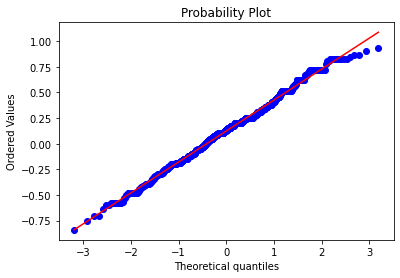

In [29]:
check_distribution(f_f_sample)

###### Normality assumption check for distribution of male sentences

The same must be accomplished also for male gendered sentences written by female authors.

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.7214781787437088
The mean is: 0.12355593112114927
The std is: 0.3116307819025661
So, data follow a normal distribution.


(0.12355593112114927, 0.3116307819025661)

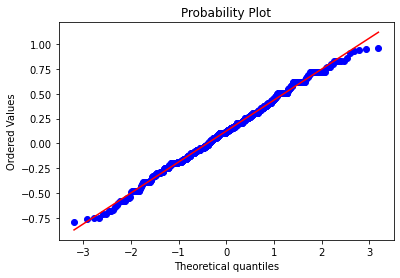

In [30]:
check_distribution(f_m_sample)

---------------

<b><u>T-Test assumptions check</u></b>

<b><u>Homogeneity of variances</u></b>

We can now perform an <span style="color:#EE6352"><i>F-test</i></span> on the variances of the two samples.

In [32]:
f_test(f_f_sample, f_m_sample)

According to an F-test, we cannot reject the null hypothesis, in fact:
The F-statistics is: 1.067948233245144
The p-value is: 0.1510971059358437
The two variances do not differ in a significant way


(1.067948233245144, 0.1510971059358437)

--------

------------

------------

Finally, we can move on into seeing the emotions related data extracted from our corpus.

In [33]:
for url in f_authors_texts:
    f_emotions = emotion_frequencies(url, f_emotions)
    del f_emotions["anticip"]
f_emotions

{'fear': 0.057946881949255666,
 'anger': 0.04438463557872665,
 'trust': 0.1281726285283127,
 'surprise': 0.0628587423318065,
 'positive': 0.21442012380188197,
 'negative': 0.13158648805562528,
 'sadness': 0.07491549563308775,
 'disgust': 0.04427470169695566,
 'joy': 0.12110895897604768,
 'anticipation': 0.12033134344830015}

##### 2.2.a) Common words

Now, we extract the proper nouns contained in our texts.</br> <span style="color:red">According to our code, proper nouns are such words which appear capitalized with a probability of 100% inside our text in a position different from the first position of each sentence (as the function to recognize them states).</span></br>
Moreover, some particular situations have been taken into account (an example of it is the occurence of "I" and of punctuation, these have been considered and removed from the list of proper nouns).

In [ ]:
f_proper_nouns_set = set([word for word in f_proper_nouns if  
                        f_proper_nouns[word].get('upper',0) / 
            (f_proper_nouns[word].get('upper',0) + f_proper_nouns[word].get('lower',0)) 
                        == 1])

Then, in order to display some statistics about the words used in gendered sentences, we first need to compute a list of the most <span style="color:#F7D6E0">common words in female and male sentences</span> that female authors tend to use inside the texts that compose the related corpus.</br>
The easiest way to do that is to retrieve our sorted <i>word_freq</i> dictionaries and to take out from these the most common words from the '<u><i>female</i></u>' and '<u><i>male</i></u>' keys.</br>
From such list we will need to take out all the words used together with a specific gender classification.

In [ ]:
f_common_words=set([w for w in sorted (f_word_freq['female'],key=f_word_freq['female'].get,reverse=True)[:1000]]+
                    [w for w in sorted (f_word_freq['male'],key=f_word_freq['male'].get,reverse=True)[:1000]])
f_common_words=list(f_common_words-male_words-female_words-f_proper_nouns_set-animals_list-common_ws_list)

The first operation to perform, on the common_words list, is to POS-tag the words that are stored inside it.</br>
Such POS-tagged words will be placed inside a dictionary and we will print out all the different POS in order to perform a more accurate analysis of the corpus in the subsequent stages.</br>
The decision to use the universal POS-tagger is due to the fact that tagging operations in NLP are not so accurate, therefore we preferred to use a more general (so, with less definens) tagset.

In [ ]:
f_tagged_words = {}
for word in pos_tagging(f_common_words, True):
    if word[1] not in f_tagged_words:
        f_tagged_words[word[1]] = []
    f_tagged_words[word[1]].append(word[0])
print(f_tagged_words.keys())   

dict_keys(['VERB', 'ADV', 'ADJ', 'NOUN', 'ADP', 'PRON', 'X', 'NUM', 'PRT', 'DET'])


Once we have our list of common words and the dictionary containing POS-tagged words, what we need to do is to compute the ratio of each one of the words for what concerns its relative presence in male and female gendered sentences.</br></br>
In this step we took into consideration the possibility that a word may appear the same amount of time for both genders but, one possible situation is when it appears 10 times, for example, in 50 male sentences and 10 times in 200 female sentences. Basically, that is the reason behind the necessity to compute its <i>relative frequency</i>.</br></br>
In such particular situations, we must be aware of the possible imbalance between occurrences and sentences. </br>
This is the reason that led us to compute the percentage of presence of our target word in male sentences, with respect to the percentage of presence of the same target word over the totality of sentences (also female).</br></br>
Finally, in order to obtain the female sentences percentage of occurrency of a specific word, we will just need to compute the inverse percentage.

In [135]:
f_male_percent = { word :
     (f_word_freq['male'].get(word,0)/f_word_counter['male'])/ 
     (f_word_freq['female'].get(word,0)/f_word_counter['female'] + 
      f_word_freq['male'].get(word,0)/f_word_counter['male']) 
    for word in f_common_words if word in f_tagged_words["NOUN"] or word in f_tagged_words["VERB"] or word in f_tagged_words["ADJ"]}

Once we have computed such male percentages, we will display our results in a tabular form.</br>
In particular, we will display the 50 most common words (if exist) for female and male contexts, that has <b>a ratio of presence higher than 3</b>, that means only those words which appear at least 2 times for a gender out of 1 time for the other.</br> 
All the words which appear just for one of the two main genders (f & m) will be displayed with a ratio = 100 by default.

Moreover, we enhance the precision of the analysis by storing such words, as well as the 50 most common nouns, verbs and adjectives related to female and male contexts.</br></br>
All these words will be placed inside some different sets that we will analyze in a qualitative way in the following sections.</br> </br>
First for male words and then for female words, again in reference corpus, thats is in this case for texts with female authors.

In [136]:
print('COMMON WORDS')
print('Male words in the female author corpus')
common_words_df(f_word_freq, f_male_percent, f_male_general, True)

COMMON WORDS
Male words in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,rode,100.00,0,12,0.0000,1.0000
1,excitement,100.00,0,11,0.0000,1.0000
2,quality,100.00,0,9,0.0000,1.0000
3,agreeable,100.00,0,13,0.0000,1.0000
4,corn,100.00,0,9,0.0000,1.0000
5,broad,100.00,0,14,0.0000,1.0000
6,governor,100.00,0,13,0.0000,1.0000
7,stool,100.00,0,10,0.0000,1.0000
8,sovereign,100.00,0,15,0.0000,1.0000
9,hung,100.00,0,14,0.0000,1.0000


In [137]:
print('COMMON WORDS')
print('Female words in the female author corpus')
common_words_df(f_word_freq, f_male_percent, f_female_general, False)

COMMON WORDS
Female words in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,spinning,100.00,5,0,1.0000,0.0000
1,baby,100.00,4,0,1.0000,0.0000
2,faded,100.00,5,0,1.0000,0.0000
3,scrap,100.00,4,0,1.0000,0.0000
4,cloud,100.00,4,0,1.0000,0.0000
5,ornament,100.00,5,0,1.0000,0.0000
6,needlework,100.00,4,0,1.0000,0.0000
7,hostess,100.00,8,0,1.0000,0.0000
8,east,100.00,4,0,1.0000,0.0000
9,ante,100.00,7,0,1.0000,0.0000


##### 2.2.b) Common nouns

In [138]:
f_male_nouns_percent = { word :
                         (f_word_freq['male'].get(word,0)/f_word_counter['male'])/ 
                         (f_word_freq['female'].get(word,0)/f_word_counter['female'] + 
                          f_word_freq['male'].get(word,0)/f_word_counter['male']) 
                        for word in f_common_words if word in f_tagged_words["NOUN"]}

In [139]:
print('NOUNS')
print('Male nouns in the female author corpus')
common_words_df(f_word_freq, f_male_nouns_percent, f_male_nouns, True)

NOUNS
Male nouns in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,rode,100.00,0,12,0.0000,1.0000
1,quality,100.00,0,9,0.0000,1.0000
2,corn,100.00,0,9,0.0000,1.0000
3,stool,100.00,0,10,0.0000,1.0000
4,hung,100.00,0,14,0.0000,1.0000
5,fellow,100.00,0,54,0.0000,1.0000
6,newspaper,100.00,0,14,0.0000,1.0000
7,hearth,100.00,0,9,0.0000,1.0000
8,spot,100.00,0,9,0.0000,1.0000
9,owner,100.00,0,10,0.0000,1.0000


In [140]:
print('NOUNS')
print('Female nouns in the female author corpus')
common_words_df(f_word_freq, f_male_nouns_percent, f_female_nouns, False)

NOUNS
Female nouns in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,baby,100.00,4,0,1.0000,0.0000
1,scrap,100.00,4,0,1.0000,0.0000
2,cloud,100.00,4,0,1.0000,0.0000
3,ornament,100.00,5,0,1.0000,0.0000
4,needlework,100.00,4,0,1.0000,0.0000
5,hostess,100.00,8,0,1.0000,0.0000
6,ante,100.00,7,0,1.0000,0.0000
7,dame,32.68,13,1,0.9703,0.0297
8,cuckoo's,25.14,10,1,0.9617,0.0383
9,garret,22.62,9,1,0.9577,0.0423


##### 2.2.c) Common verbs

In [141]:
f_male_verbs_percent = { word :
                         (f_word_freq['male'].get(word,0)/f_word_counter['male'])/ 
                         (f_word_freq['female'].get(word,0)/f_word_counter['female'] + 
                          f_word_freq['male'].get(word,0)/f_word_counter['male']) 
                        for word in f_common_words if word in f_tagged_words["VERB"]}

In [142]:
print('VERBS')
print('Male verbs in the female author corpus')
common_words_df(f_word_freq, f_male_verbs_percent, f_male_verbs, True)

VERBS
Male verbs in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,learned,7.56,1,19,0.1168,0.8832
1,killed,6.37,1,16,0.1358,0.8642
2,tempered,5.97,1,15,0.1435,0.8565
3,cared,5.17,1,13,0.1620,0.8380
4,rubbed,4.77,1,12,0.1732,0.8268
5,pay,4.77,2,24,0.1732,0.8268
6,hoped,4.38,1,11,0.1860,0.8140
7,brave,4.18,2,21,0.1932,0.8068
8,driving,3.98,1,10,0.2009,0.7991
9,paid,3.98,1,10,0.2009,0.7991


In [143]:
print('VERBS')
print('Female verbs in the female author corpus')
common_words_df(f_word_freq, f_male_verbs_percent, f_female_verbs, False)

VERBS
Female verbs in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,spinning,100.00,5,0,1.0000,0.0000
1,faded,100.00,5,0,1.0000,0.0000
2,nodded,27.65,11,1,0.9651,0.0349
3,maid,17.60,14,2,0.9462,0.0538
4,curled,15.08,6,1,0.9378,0.0622
5,pit,15.08,6,1,0.9378,0.0622
6,knitting,12.57,5,1,0.9263,0.0737
7,discovered,12.57,5,1,0.9263,0.0737
8,laying,10.05,4,1,0.9095,0.0905
9,sighed,10.05,4,1,0.9095,0.0905


##### 2.2.d) Common adjectives

In [144]:
f_male_adjectives_percent = { word :
                         (f_word_freq['male'].get(word,0)/f_word_counter['male'])/ 
                         (f_word_freq['female'].get(word,0)/f_word_counter['female'] + 
                          f_word_freq['male'].get(word,0)/f_word_counter['male']) 
                        for word in f_common_words if word in f_tagged_words["ADJ"]}

In [145]:
print('ADJECTIVES')
print('Male adjectives in the female author corpus')
common_words_df(f_word_freq, f_male_adjectives_percent, f_male_adjectives, True)

ADJECTIVES
Male adjectives in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,excitement,100.00,0,11,0.0000,1.0000
1,agreeable,100.00,0,13,0.0000,1.0000
2,broad,100.00,0,14,0.0000,1.0000
3,governor,100.00,0,13,0.0000,1.0000
4,sovereign,100.00,0,15,0.0000,1.0000
5,baa,100.00,0,11,0.0000,1.0000
6,busy,100.00,0,9,0.0000,1.0000
7,curious,100.00,0,17,0.0000,1.0000
8,quick,100.00,0,11,0.0000,1.0000
9,indian,11.54,1,29,0.0798,0.9202


In [146]:
print('ADJECTIVES')
print('Female adjectives in the female author corpus')
common_words_df(f_word_freq, f_male_adjectives_percent, f_female_adjectives, False)

ADJECTIVES
Female adjectives in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,east,100.00,4,0,1.0000,0.0000
1,gown,17.60,7,1,0.9462,0.0538
2,parlour,12.57,5,1,0.9263,0.0737
3,tea,11.49,32,7,0.9199,0.0801
4,shawl,8.80,7,2,0.8979,0.1021
5,one's,7.54,6,2,0.8829,0.1171
6,smooth,6.28,5,2,0.8627,0.1373
7,grey,5.53,11,5,0.8469,0.1531
8,nurse,5.22,27,13,0.8392,0.1608
9,hyacinth,5.03,4,2,0.8341,0.1659


#### 2.3) Corpus analysis - Male authors 

The same kind of analysis based on classifications of sentences with respect to their gender will be performed in the following snippets of code.</br></br>
Obviously, this time we will make use of the other dictionaries.

In [37]:
for url in m_authors_texts:
    text = text_reader(url)
    gender_analysis(text, m_sentence_counter, m_word_counter, male_authors_raw_count, m_word_freq, m_sentiment, m_proper_nouns, male_words, female_words)

m_proper_nouns_set = set([word for word in m_proper_nouns if  
                        m_proper_nouns[word].get('upper',0) / 
            (m_proper_nouns[word].get('upper',0) + m_proper_nouns[word].get('lower',0)) 
                        == 1])
m_proper_nouns_set.add("janet")

m_common_words=set([w for w in sorted (m_word_freq['female'],key=m_word_freq['female'].get,reverse=True)[:1000]]+
                    [w for w in sorted (m_word_freq['male'],key=m_word_freq['male'].get,reverse=True)[:1000]])
m_common_words=list(m_common_words-male_words-female_words-m_proper_nouns_set-animals_list-common_ws_list)

In [38]:
m_tagged_words = {}
for word in pos_tagging(m_common_words, True):
    if word[1] not in m_tagged_words:
        m_tagged_words[word[1]] = []
    m_tagged_words[word[1]].append(word[0])

In [39]:
print ('%.1f%% gendered.' % (100*(m_sentence_counter['male'] + m_sentence_counter['female'])/
                           (m_sentence_counter['male'] + m_sentence_counter['female'] + m_sentence_counter['both'] + 
                           m_sentence_counter['none'])))
print ('%s sentences about men.' % m_sentence_counter['male'])
print ('%s sentences about women.' % m_sentence_counter['female'])
print ('%.1f sentences about men for each sentence about women.' % (m_sentence_counter['male']/m_sentence_counter['female']))

42.6% gendered.
12898 sentences about men.
5145 sentences about women.
2.5 sentences about men for each sentence about women.


In [40]:
positive_score = 0
positive_count = 0
negative_score = 0
negative_count = 0
neutral_count = 0

for sentiment in m_sentiment["male"]:
    for sentence in m_sentiment["male"][sentiment]:
        if sentiment == 'POS':
            positive_score += m_sentiment["male"][sentiment][sentence]
            positive_count += 1
        elif sentiment == 'NEG':
            negative_score += m_sentiment["male"][sentiment][sentence]
            negative_count += 1
        else:
            neutral_count += 1
positive_mean = positive_score/positive_count
negative_mean = negative_score/negative_count
print("Over the", positive_count, "positive sentences about male, their polarity score mean is:", positive_mean)
print("Over the", negative_count, "negative sentences about male, their polarity score mean is:", negative_mean)
print("The overall mean of polarity score in the", positive_count+negative_count, "positive and negative sentences about male is:", (positive_score+negative_score)/(neutral_count+positive_count+negative_count))

Over the 5414 positive sentences about male, their polarity score mean is: 0.2753020725681067
Over the 3065 negative sentences about male, their polarity score mean is: -0.20288992002521022
The overall mean of polarity score in the 8479 positive and negative sentences about male is: 0.06750293876332455


In [41]:
positive_score = 0
positive_count = 0
negative_score = 0
negative_count = 0
neutral_count = 0

for sentiment in m_sentiment["female"]:
    for sentence in m_sentiment["female"][sentiment]:
        if sentiment == 'POS':
            positive_score += m_sentiment["female"][sentiment][sentence]
            positive_count += 1
        elif sentiment == 'NEG':
            negative_score += m_sentiment["female"][sentiment][sentence]
            negative_count += 1
        else:
            neutral_count += 1
positive_mean = positive_score/positive_count
negative_mean = negative_score/negative_count
print("Over the", positive_count, "positive sentences about female, their polarity score mean is:", positive_mean)
print("Over the", negative_count, "negative sentences about female, their polarity score mean is:", negative_mean)
print("The overall mean of polarity score in the", positive_count+negative_count, "positive and negative sentences about female is:", (positive_score+negative_score)/(neutral_count+positive_count+negative_count))

Over the 2087 positive sentences about female, their polarity score mean is: 0.28783213007147923
Over the 1184 negative sentences about female, their polarity score mean is: -0.2209788378658357
The overall mean of polarity score in the 3271 positive and negative sentences about female is: 0.06601766188201473


In [152]:
for url in m_authors_texts:
    m_emotions = emotion_frequencies(url, m_emotions)
    del m_emotions["anticip"]
m_emotions

{'fear': 0.0863821014217777,
 'anger': 0.06291325682606186,
 'trust': 0.1227107083818445,
 'surprise': 0.05498552617233132,
 'positive': 0.19003780836231707,
 'negative': 0.15676534744713874,
 'sadness': 0.07640468780183313,
 'disgust': 0.04685311042935694,
 'joy': 0.09959770332324318,
 'anticipation': 0.10334974983409559}

##### 2.3.a) Common words

In [153]:
m_male_percent = { word :
     (m_word_freq['male'].get(word,0)/m_word_counter['male'])/ 
     (m_word_freq['female'].get(word,0)/m_word_counter['female'] + 
      m_word_freq['male'].get(word,0)/m_word_counter['male']) 
    for word in m_common_words if word in m_tagged_words["NOUN"] or word in m_tagged_words["VERB"] or word in m_tagged_words["ADJ"]}

In [154]:
print('COMMON WORDS')
print('Male words in the male author corpus')
common_words_df(m_word_freq, m_male_percent, m_male_general, True)

COMMON WORDS
Male words in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,jack,100.00,0,49,0.0000,1.0000
1,rum,100.00,0,28,0.0000,1.0000
2,fag,100.00,0,25,0.0000,1.0000
3,fifth,100.00,0,33,0.0000,1.0000
4,stable,100.00,0,31,0.0000,1.0000
5,coffee,100.00,0,29,0.0000,1.0000
6,han,100.00,0,29,0.0000,1.0000
7,jungle,19.59,1,58,0.0486,0.9514
8,mell,19.25,1,57,0.0494,0.9506
9,pipe,16.89,1,50,0.0559,0.9441


In [155]:
print('COMMON WORDS')
print('Female words in the male author corpus')
common_words_df(m_word_freq, m_male_percent, m_female_general, False)

COMMON WORDS
Female words in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,bonnet,62.17,21,1,0.9842,0.0158
1,fender,26.64,9,1,0.9638,0.0362
2,fan,11.84,16,4,0.9221,0.0779
3,trot,8.34,31,11,0.8930,0.1070
4,dearest,8.29,14,5,0.8923,0.1077
5,lap,8.14,11,4,0.8906,0.1094
6,cheerful,7.89,16,6,0.8876,0.1124
7,dress,7.80,29,11,0.8864,0.1136
8,affectionate,6.66,9,4,0.8695,0.1305
9,kiss,6.46,24,11,0.8659,0.1341


##### 2.3.b) Common nouns

In [156]:
m_male_nouns_percent = { word :
                         (m_word_freq['male'].get(word,0)/m_word_counter['male'])/ 
                         (m_word_freq['female'].get(word,0)/m_word_counter['female'] + 
                          m_word_freq['male'].get(word,0)/m_word_counter['male']) 
                        for word in m_common_words if word in m_tagged_words["NOUN"]}

In [157]:
print('NOUNS')
print('Male nouns in the male author corpus')
common_words_df(m_word_freq, m_male_nouns_percent, m_male_nouns, True)

NOUNS
Male nouns in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,jack,100.00,0,49,0.0000,1.0000
1,rum,100.00,0,28,0.0000,1.0000
2,coffee,100.00,0,29,0.0000,1.0000
3,han,100.00,0,29,0.0000,1.0000
4,jungle,19.59,1,58,0.0486,0.9514
5,mell,19.25,1,57,0.0494,0.9506
6,pipe,16.89,1,50,0.0559,0.9441
7,study,12.33,2,73,0.0750,0.9250
8,consequence,12.16,1,36,0.0760,0.9240
9,boot,12.16,1,36,0.0760,0.9240


In [158]:
print('NOUNS')
print('Female nouns in the male author corpus')
common_words_df(m_word_freq, m_male_nouns_percent, m_female_nouns, False)

NOUNS
Female nouns in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,bonnet,62.17,21,1,0.9842,0.0158
1,fender,26.64,9,1,0.9638,0.0362
2,fan,11.84,16,4,0.9221,0.0779
3,trot,8.34,31,11,0.8930,0.1070
4,dress,7.80,29,11,0.8864,0.1136
5,kiss,6.46,24,11,0.8659,0.1341
6,beauty,5.26,16,9,0.8403,0.1597
7,blossom,4.65,11,7,0.8231,0.1769
8,cottage,4.60,14,9,0.8216,0.1784
9,curl,4.44,9,6,0.8162,0.1838


##### 2.2.c) Common verbs

In [159]:
m_male_verbs_percent = { word :
                         (m_word_freq['male'].get(word,0)/m_word_counter['male'])/ 
                         (m_word_freq['female'].get(word,0)/m_word_counter['female'] + 
                          m_word_freq['male'].get(word,0)/m_word_counter['male']) 
                        for word in m_common_words if word in m_tagged_words["VERB"]}

In [160]:
print('VERBS')
print('Male verbs in the male author corpus')
common_words_df(m_word_freq, m_male_verbs_percent, m_male_verbs, True)

VERBS
Male verbs in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,fag,100.00,0,25,0.0000,1.0000
1,sixth,11.82,1,35,0.0780,0.9220
2,farmer,8.78,1,26,0.1022,0.8978
3,killed,3.04,3,27,0.2475,0.7525


In [161]:
print('VERBS')
print('Female verbs in the male author corpus')
common_words_df(m_word_freq, m_male_verbs_percent, m_female_verbs, False)

VERBS
Female verbs in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,lap,8.14,11,4,0.8906,0.1094
1,trembled,5.92,10,5,0.8555,0.1445
2,tucked,5.92,8,4,0.8555,0.1445
3,clasped,4.93,10,6,0.8315,0.1685
4,vanished,4.44,9,6,0.8162,0.1838
5,folded,4.14,14,10,0.8056,0.1944
6,fancied,3.85,13,10,0.7937,0.2063
7,dancing,3.85,13,10,0.7937,0.2063
8,married,3.43,22,19,0.7742,0.2258
9,natured,3.38,8,7,0.7719,0.2281


##### 2.2.d) Common adjectives

In [162]:
m_male_adjectives_percent = { word :
                         (m_word_freq['male'].get(word,0)/m_word_counter['male'])/ 
                         (m_word_freq['female'].get(word,0)/m_word_counter['female'] + 
                          m_word_freq['male'].get(word,0)/m_word_counter['male']) 
                        for word in m_common_words if word in m_tagged_words["ADJ"]}

In [163]:
print('ADJECTIVES')
print('Male adjectives in the male author corpus')
common_words_df(m_word_freq, m_male_adjectives_percent, m_male_adjectives, True)

ADJECTIVES
Male adjectives in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,fifth,100.00,0,33,0.0000,1.0000
1,stable,100.00,0,31,0.0000,1.0000
2,nag,7.43,2,44,0.1186,0.8814
3,brown,6.15,5,91,0.1399,0.8601
4,east,5.83,8,138,0.1465,0.8535
5,gray,5.07,3,45,0.1648,0.8352
6,rush,4.90,2,29,0.1695,0.8305
7,wooden,4.39,2,26,0.1855,0.8145
8,respectable,4.05,2,24,0.1979,0.8021
9,middle,3.38,5,50,0.2284,0.7716


In [164]:
print('ADJECTIVES')
print('Female adjectives in the male author corpus')
common_words_df(m_word_freq, m_male_adjectives_percent, m_female_adjectives, False)

ADJECTIVES
Female adjectives in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,dearest,8.29,14,5,0.8923,0.1077
1,cheerful,7.89,16,6,0.8876,0.1124
2,affectionate,6.66,9,4,0.8695,0.1305
3,childish,5.92,12,6,0.8555,0.1445
4,sweet,5.92,26,13,0.8555,0.1445
5,needle,5.92,10,5,0.8555,0.1445
6,innocent,4.81,13,8,0.8279,0.1721
7,grief,4.07,11,8,0.8028,0.1972
8,stupid,3.95,8,6,0.7979,0.2021
9,nurse,3.95,12,9,0.7979,0.2021


### Section 3: Graphical representations & Statistics

In this section, we aim to compute the concordances of the most common words in each corpus.</br>
Moreover, we will display some graphical representations of our data.</br>
Whatever will come out from this part of the analysis will be analyzed in the subsequent section in order to draw some conclusions about the differences that may exist between texts written by authors with different genders.

#### 3.1) Concordances

In this section, we aim at analyzing what we have extracted from the previous step.</br>
In particular, the first kind of analysis has the purpose of printing out the concordances for each one of the most common words in female and male context. Obviously, such kind of analysis will take place for each one of our corpus.</br>
The extracted concordances can be found in files called <span style="color:#EE6352">f_female_concordances.txt</span>, <span style="color:#EE6352">f_male_concordances.txt</span>, <span style="color:#EE6352">m_female_concordances.txt</span> and <span style="color:#EE6352">m_male_concordances.txt</span>.</br>
Such file can be found in the [Concordances directory](Concordances/).

<i>If you want to re-use such notebook, in this section you will not find the code to save concordances into the directory, that's because we have decided to use the NLTK built in function to retrieve concordances.</br>
So, the best approach is to open the full output in a text editor and save it subsequently.</i>

##### 3.1.a) Female words in female authors corpus

In [168]:
for word in f_female_general:
    print(word, '\n')
    for url in f_authors_texts:
        print(url)
        text = text_reader(url)
        print(word_concordances(word, text, False), '\n')
    print('\n')

spinning 

Raw/F/1857_grannys_wonderful_chair.txt
Displaying 2 of 2 matches:
 On that chair Dame Frostyface sat spinning from morning till night, to keep h
wn of grey cloth, edged with gold, spinning on an ivory wheel in a fine painte
None 

Raw/F/1869_mrs_overtheways_remembrances.txt
no matches
None 

Raw/F/1872_a_dog_of_flanders.txt
no matches
None 

Raw/F/1877_black_beauty.txt
no matches
None 

Raw/F/1877_the_cuckoo_clock.txt
Displaying 2 of 2 matches:
read into her hands again, and sat spinning fortwo or three minutes without an
anything that he asked. So she sat spinning and thinkingfor a little while, an
None 

Raw/F/1886_little_lord_fauntleroy.txt
no matches
None 

Raw/F/1899_the_story_of_the_treasure_seekers.txt
no matches
None 

Raw/F/1902_the_tale_of_peter_rabbit.txt
no matches
None 



east 

Raw/F/1857_grannys_wonderful_chair.txt
Displaying 4 of 4 matches:
e there lived two noble lords in the east country. Their lands lay between a b
ord of the Grey. No lords in all the eas

##### 3.1.b) Male words in female authors corpus

In [169]:
for word in f_male_general:
    print(word, '\n')
    for url in f_authors_texts:
        print(url)
        text = text_reader(url)
        print(word_concordances(word, text, False), '\n')
    print('\n')

wealth 

Raw/F/1857_grannys_wonderful_chair.txt
Displaying 1 of 1 matches:
d names beside, for leaving so much wealth behind them, and utterly refused to
None 

Raw/F/1869_mrs_overtheways_remembrances.txt
Displaying 1 of 1 matches:
asse_ countless suitors of fabulous wealth and nobility; but when it came to M
None 

Raw/F/1872_a_dog_of_flanders.txt
no matches
None 

Raw/F/1877_black_beauty.txt
no matches
None 

Raw/F/1877_the_cuckoo_clock.txt
no matches
None 

Raw/F/1886_little_lord_fauntleroy.txt
Displaying 7 of 7 matches:
out its grand estates and its great wealth and importance; and, in a cold, bus
imed Mrs. Errol. “It will seem like wealth to them. I can scarcely believe tha
m to think of other people; all his wealth and power, all the benefits from hi
had used his youth and strength and wealth and power only to please himself an
id not--how far they extended, what wealth they represented, and how many peop
 person, however much he envied the wealth and stately name and power, and 

##### 3.1.c) Female words in male authors corpus

In [170]:
for word in m_female_general:
    print(word, '\n')
    for url in m_authors_texts:
        print(url)
        text = text_reader(url)
        print(word_concordances(word, text, False), '\n')
    print('\n')

fan 

Raw/M/1857_tom_browns_school_days.txt
no matches
None 

Raw/M/1865_alices_adventures_in_wonderland.txt
Displaying 8 of 8 matches:
te kid gloves in one hand and a large fan in the other: he came trotting along 
ard as he could go. Alice took up the fan and gloves, and, as the hall was very
nd out that the cause of this was the fan she was holding, and she dropped it h
 a moment that it was looking for the fan and the pair of white kid gloves, and
who I am! But I’d better take him his fan and gloves—that is, if I can find the
of the house before she had found the fan and gloves. “How queer it seems,” Ali
indow, and on it (as she had hoped) a fan and two or three pairs of tiny white 
iny white kid gloves: she took up the fan and a pair of the gloves, and was jus
None 

Raw/M/1869_david_copperfield.txt
Displaying 11 of 11 matches:
middle, a large round green screen or fan fastened on to the windowsill, a smal
sitting herself down behind the green fan or screen I have already mentione

##### 3.1.d) Male words in male authors corpus

In [171]:
for word in m_male_general:
    print(word, '\n')
    for url in m_authors_texts:
        print(url)
        text = text_reader(url)
        print(word_concordances(word, text, False), '\n')
    print('\n')

east 

Raw/M/1857_tom_browns_school_days.txt
Displaying 25 of 150 matches:
ns left it, except that cairn on the east side, left by her Majesty's corps of
candour like a lower-school boy, and East was a genuine specimen--frank, heart
as fast as he could understand them. East was great in the character of cicero
dies), into the matron's room, where East introduced Tom to that dignitary; ma
nd lounging, some of whom shouted to East to stop; but he shot through with hi
one of these, in the bottom passage, East bolted with our hero, slamming and b
ne corner. This was the residence of East and another boy in the same form, an
at the end to keep order there), and East a few paces higher. And now Tom for 
way went East, Tom close behind him. East was evidently putting his best foot 
s chapter of accidents, and followed East across the level ground till they ca
re really such break-neck affairs as East represented, and whether, if they we
 to wonder, however, for next minute East cried out, “Hu

#### 3.2) Word Clouds and frequency distributions

In this step, we want to generate two word clouds, based on the most used words by female and male authors.</br>
In order to do that, we need to clean better our data; we will compute this operation with regard to gendered words, proper names and, finally, words coming from the list of common words and the list of general animal names.</br></br>
Together with the word clouds, we will print out also some graphs concerning the frequency distributions of the 30 most common words in each of the two corpora.</br>
Such graphs will take be comprehensive of common words, as well as of stopwords.

In [172]:
to_remove = set()
for word in male_authors_raw_count:
    if word.lower() in animals_list or word.lower() in common_ws_list or word.lower() in f_proper_nouns_set or word.lower() in m_proper_nouns_set:
        to_remove.add(word)
        #del male_authors_raw_count[word]
for word in female_authors_raw_count:
    if word.lower() in animals_list or word.lower() in common_ws_list or word.lower() in f_proper_nouns_set or word.lower() in m_proper_nouns_set:
        to_remove.add(word)
        #del female_authors_raw_count[word]
for word in to_remove:
    try:
        del male_authors_raw_count[word]
    except:
        pass
    try:
        del female_authors_raw_count[word]
    except:
        pass

##### 3.2.a) Female authors

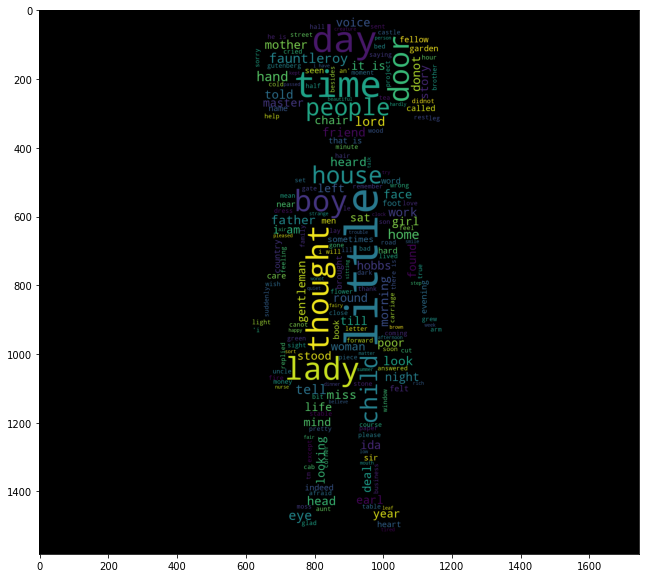

In [173]:
wordcloud_generator(female_authors_raw_count, False)

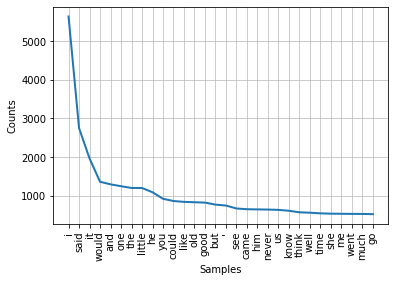

[('i', 5635),
 ('said', 2749),
 ('it', 1964),
 ('would', 1359),
 ('and', 1293),
 ('one', 1244),
 ('the', 1199),
 ('little', 1198),
 ('he', 1088),
 ('you', 919),
 ('could', 861),
 ('like', 839),
 ('old', 830),
 ('good', 820),
 ('but', 768),
 ("'", 744),
 ('see', 668),
 ('came', 649),
 ('him', 644),
 ('never', 640),
 ('us', 632),
 ('know', 609),
 ('think', 569),
 ('well', 559),
 ('time', 542),
 ('she', 534),
 ('me', 531),
 ('went', 528),
 ('much', 527),
 ('go', 521)]

In [174]:
frequency_distribution(f_authors_texts, 30)

##### 3.2.b) Male authors

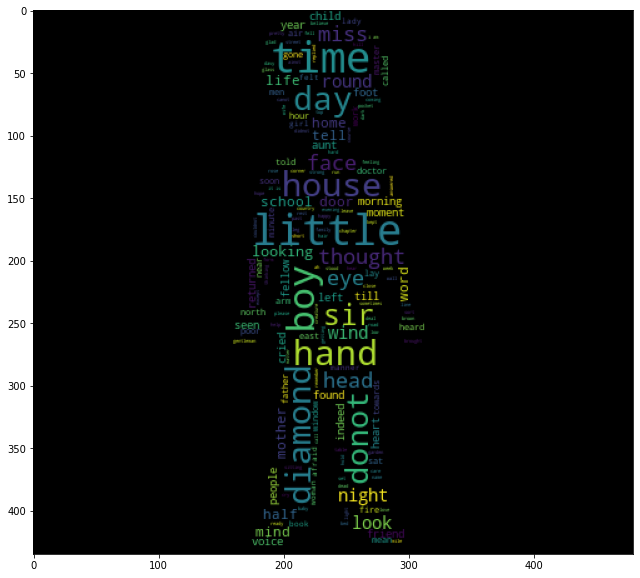

In [175]:
wordcloud_generator(male_authors_raw_count, True)

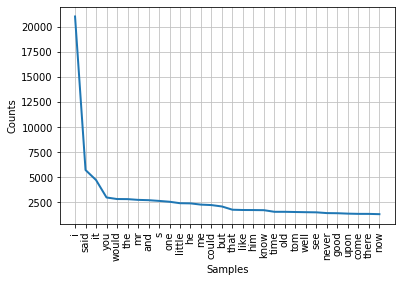

[('i', 21015),
 ('said', 5706),
 ('it', 4709),
 ('you', 2969),
 ('would', 2814),
 ('the', 2806),
 ('mr', 2731),
 ('and', 2700),
 ('s', 2628),
 ('one', 2543),
 ('little', 2398),
 ('he', 2381),
 ('me', 2257),
 ('could', 2211),
 ('but', 2071),
 ('that', 1748),
 ('like', 1720),
 ('him', 1715),
 ('know', 1702),
 ('time', 1540),
 ('old', 1540),
 ('tom', 1520),
 ('well', 1502),
 ('see', 1487),
 ('never', 1412),
 ('good', 1400),
 ('upon', 1358),
 ('come', 1335),
 ('there', 1333),
 ('now', 1305)]

In [176]:
frequency_distribution(m_authors_texts, 30)

#### 3.4) Sentiment and emotion analysis

The purpose of this sub-section is maybe the most important one of this project.</br>
We will compute the differences between gendered sentences (together with polarity scores) and between the different emotional values that the authors transmit with their works.

##### 3.4.a) Polarity scores

#### Section 4: Computing some graphs

<span style="color:red">--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</span>

#### Frequency distributions

#### Visualization Test Word Cloud

<b>Male authors</b>

<b>Female authors</b>

#### Visualization of emotions

In [177]:
dict_df = {
    "emotion": [],
    "female_scores":[],
    "male_scores":[]
}
emotion = []
f_auth = []
m_auth = []

for k in f_emotions:
    dict_df["emotion"].append(k)
    dict_df["female_scores"].append(f_emotions[k])
    dict_df["male_scores"].append(m_emotions[k])
    emotion.append(k)
    f_auth.append(f_emotions[k])
    m_auth.append(m_emotions[k])


emotions_df = pd.DataFrame(dict_df)
emotions_df

,emotion,female_scores,male_scores
0,fear,0.065818,0.086382
1,anger,0.040105,0.062913
2,trust,0.116950,0.122711
3,surprise,0.073298,0.054986
4,positive,0.175036,0.190038
5,negative,0.173901,0.156765
6,sadness,0.087316,0.076405
7,disgust,0.042579,0.046853
8,joy,0.110725,0.099598
9,anticipation,0.114270,0.103350


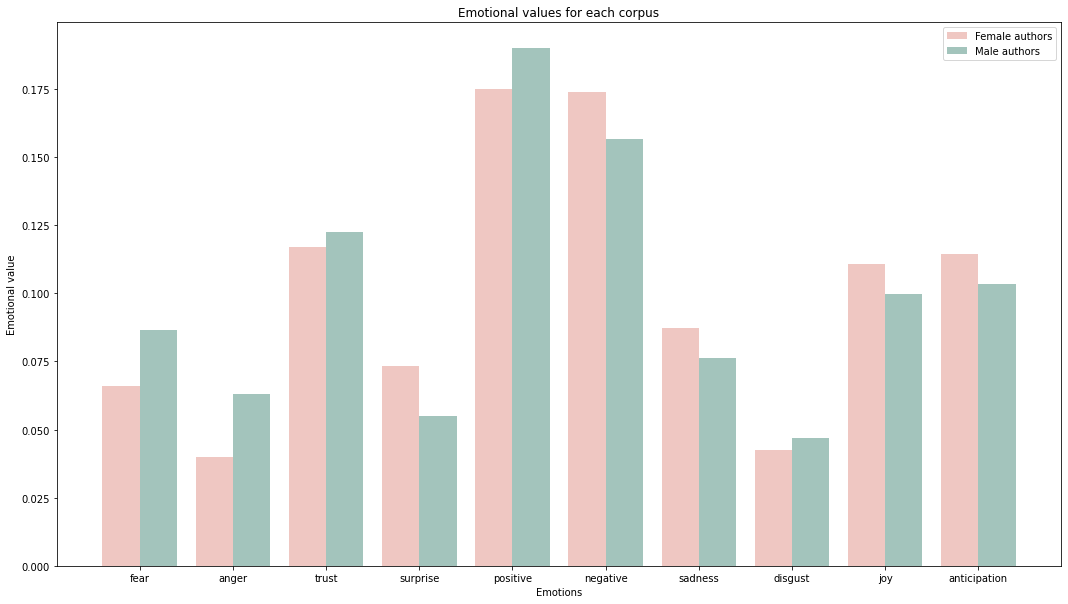

In [178]:
X = ['Group A','Group B','Group C','Group D']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(emotion))

f, ax = plt.subplots(figsize=(18,10)) 
plt.bar(X_axis - 0.2, f_auth, 0.4, label = 'Female authors', color=["#EFC7C2"])
plt.bar(X_axis + 0.2, m_auth, 0.4, label = 'Male authors', color=["#A3C4BC"])
  
plt.xticks(X_axis, emotion)
plt.xlabel("Emotions")
plt.ylabel("Emotional value")
plt.title("Emotional values for each corpus")
plt.legend()
plt.show()

Raw/M/1857_tom_browns_school_days.txt


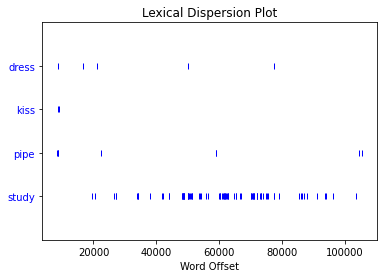

Raw/M/1865_alices_adventures_in_wonderland.txt


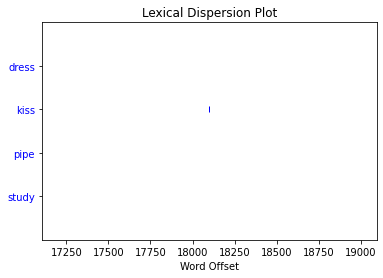

Raw/M/1869_david_copperfield.txt


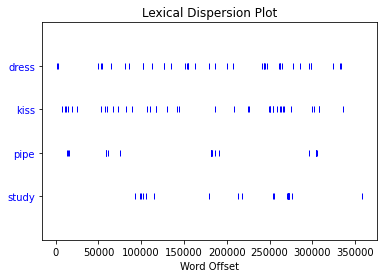

Raw/M/1871_at_the_back_of_the_north_wind.txt


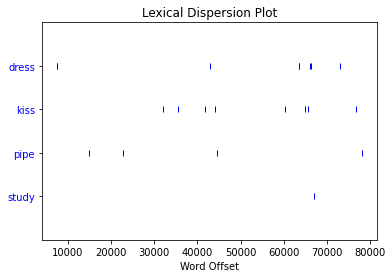

Raw/M/1876_the_adventures_of_tom_sawyer.txt


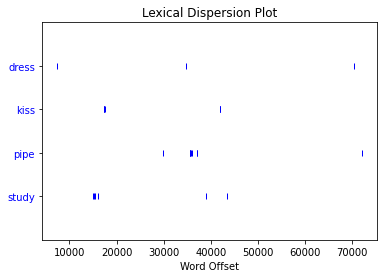

Raw/M/1883_treasure_island.txt


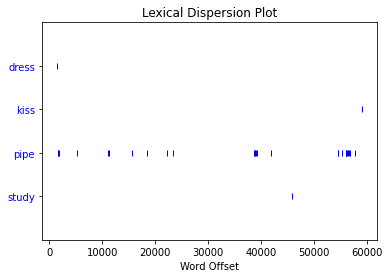

Raw/M/1888_the_happy_prince_and_other_tales.txt


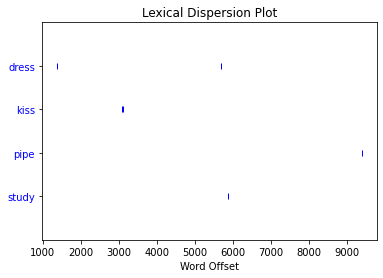

Raw/M/1894_the_jungle_book.txt


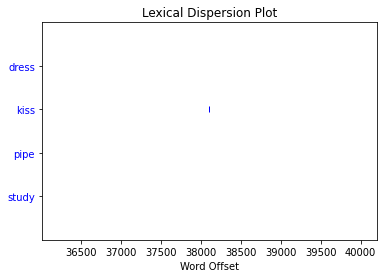

In [179]:
for url in m_authors_texts:
    print(url)
    text = text_reader(url) 
    word_dispersion_plot(['dress','kiss','pipe','study'], text, remove_punctuation=True)

<span style="color:red">The frequency distribution will be useful in the final part of the analysis in order to se if the different terms have also an evolution in time that may explain their presence.<span>

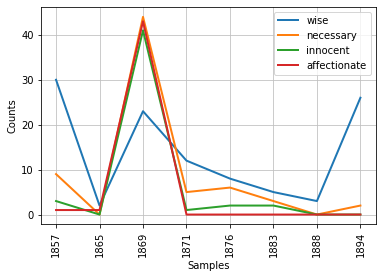

<ConditionalFreqDist with 4 conditions>

In [180]:
conditional_frequency_distribution(["innocent","affectionate","wise","necessary"], m_corpus)

#### Section 5: Results

#### Section 6: Conclusions